In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.reset_defaults()
sns.set_theme(rc={'figure.dpi': 72, 'savefig.dpi': 300,
              'figure.autolayout': True})
sns.set_style('ticks')
sns.set_context('paper')

In [32]:
# Part a
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

X, y = make_classification(n_samples=100_000, n_features=2, n_informative=2, n_redundant=0, n_repeated=0,
                           n_classes=2, n_clusters_per_class=1, weights=[0.995, 0.005], class_sep=0.5, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=0.8, random_state=42)

In [33]:
# Part b
from sklearn.svm import OneClassSVM

mdl = OneClassSVM(nu=0.01, kernel='rbf', gamma='auto')
mdl.fit(X_train)

OneClassSVM(gamma='auto', nu=0.01)

In [34]:
# Part c
from sklearn.metrics import classification_report

y_pred = mdl.predict(X_test) == -1
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     19787
           1       0.39      0.40      0.39       213

    accuracy                           0.99     20000
   macro avg       0.69      0.70      0.69     20000
weighted avg       0.99      0.99      0.99     20000



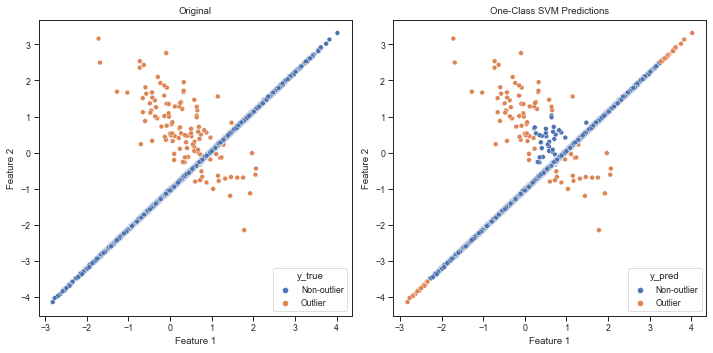

In [35]:
# Part d
df = pd.DataFrame(X_test, columns=['Feature 1', 'Feature 2'])
df['y_true'] = y_test
df['y_pred'] = y_pred
df['y_true'] = np.where(df['y_true'], 'Outlier', 'Non-outlier')
df['y_pred'] = np.where(df['y_pred'], 'Outlier', 'Non-outlier')

fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].set_title("Original")
sns.scatterplot(df, x='Feature 1', y='Feature 2', hue='y_true', ax=ax[0])

ax[1].set_title("One-Class SVM Predictions")
sns.scatterplot(df, x='Feature 1', y='Feature 2', hue='y_pred', ax=ax[1])

fig.savefig('P3_d.png')
plt.show()